In [8]:
from sentence_transformers import CrossEncoder
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np

model_name = 'sentence-transformers/all-mpnet-base-v2'
cross_encoder = CrossEncoder(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-mpnet-base-v2 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
import json
from pathlib import Path


llava_result_list = Path('/data/soyeonhong/GroundVQA/llava-v1.6-34b/global/').glob('*.json')

token_num = []
for result in llava_result_list:
    answer_list = json.loads(result.read_text())['answers']
    for answer in answer_list:
        token_num.append(tokenizer(answer[2], return_tensors='pt')['input_ids'].shape[1])

In [11]:
from collections import Counter

counter = Counter(token_num)
max_count = max(counter.values())
mode = [k for k, v in counter.items() if v == max_count]

print(f"the mode: {mode}")

the mode: [104]


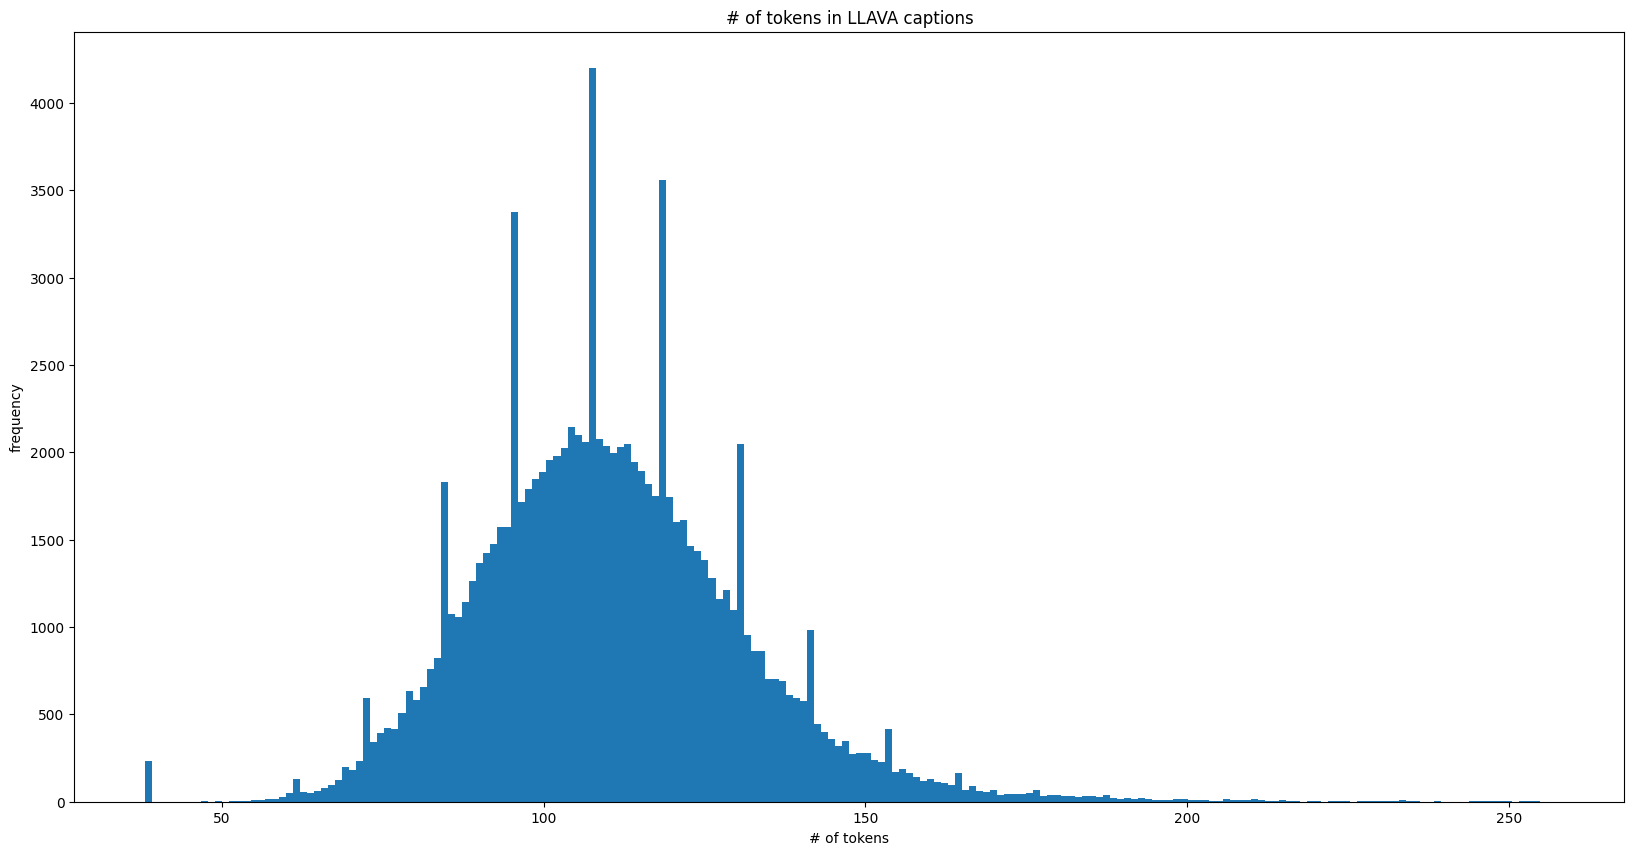

In [12]:
plt.figure(figsize=(20, 10))
plt.hist(token_num, bins=200)

plt.title('# of tokens in LLAVA captions')
plt.xlabel('# of tokens')

plt.ylabel('frequency')

plt.show()